# Biodiversity Project

### Introduction

The dataframes are of observations of species across different locations and details about the species and their conservation status. We will begin by doing some initial analysis to understand the data before creating goals for the project in the scope section. Then continuing to analysise the data to complete the question goals for this project. 

The dataframes are from Codecademy who say that the data is only inspired by real data.

### Importing libraires

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Understanding our data

Firstly, we will read in our two datasets and do some rough analysis to begin to understand the data that we are working with.

#### Observations dataset

* __scientific_name__ - The scientific name of the species
* __park_name__ - The name of the Park where the species was observed
* __observations__ - The number of observations made of the species

In [2]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


#### Species dataset

* __category__ - The class of animal
* __scientific_name__ - The scientific name of the species
* __common_names__ - The commonly known names of species
* __conservation_status__ - The current known conservation status

In [3]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Within the species dataset, there are four different conservation status' of Endangered, Threatened, Species of Concern and In Recovery, plus null values for those that are not protected. There are also seven category names of Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant and Nonvascular Plant. 

In [4]:
print('Unique category names are;', species.category.unique())
print('Unique status names are;', species.conservation_status.unique())
species.nunique()

Unique category names are; ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
Unique status names are; [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


category                  7
scientific_name        5541
common_names           5504
conservation_status       4
dtype: int64

Within the observations datset, there are four Parks where observations were recorded: Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park and Yellowstone National Park.

In [5]:
print('Unique park names are;', observations.park_name.unique())
observations.nunique()

Unique park names are; ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


scientific_name    5541
park_name             4
observations        304
dtype: int64

We are starting to get a picture of our data sets;
* Species has four columns and 5,824 rows of data across seven categories with missing values in the conservation status column for species without conservation status. 
* Obervations has three columns and 23,296 rows of data across four parks with no missing values.
* As there is a difference in the number of rows each dataframe would have, we would expect the species dataframe to have a unique column such as scientific name. We will look into this further down.

In [6]:
species.shape

(5824, 4)

In [7]:
observations.shape

(23296, 3)

In [8]:
species.isnull().sum()

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

In [9]:
observations.isnull().sum()

scientific_name    0
park_name          0
observations       0
dtype: int64

To help us with our coding we need to check the d-types.

In [10]:
species.dtypes

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object

In [11]:
observations.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

## Scope

Now we have investigated our dataset, we can begin to think about questions we would like answered. These could include:
* Out of the species with known conservation status, what proportion of the total number of species are protected?
* Is there a particular park where more observations were made?
* What species are endangered, what are their common names?
* Across all the parks, what species is the most/ least common?
* Across all the parks, what category of species is most/ least common?

## Analysis

### Species Dataset 

Let's begin by focusing on the species dataset, looking at the distribution of each class of species in the data. 

#### Category

There are mostly Vascular Plants in the data and the least number of Reptiles. We can see this more clearly in a bar chart.

In [12]:
num_categories = species['category'].value_counts().reset_index()
num_categories.columns = ['category', 'observations']
num_categories

,category,observations
0,Vascular Plant,4470
1,Bird,521
2,Nonvascular Plant,333
3,Mammal,214
4,Fish,127
5,Amphibian,80
6,Reptile,79


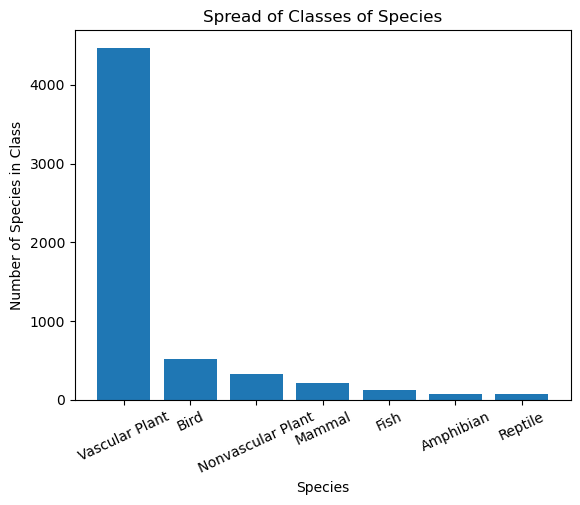

In [13]:
plt.bar(num_categories['category'], num_categories['observations'])
plt.title('Spread of Classes of Species')
plt.ylabel('Number of Species in Class')
plt.xlabel('Species')
ax = plt.subplot()
ax.set_xticks(range(0,len(list(species.category.unique()))))
ax.set_xticklabels(list(num_categories['category']), rotation=25)
plt.show()

#### Conservation Status

Next, we can look at the spread of conservation status. Of the 5,824 data values, there are 5,633 species with no conservation status. Out of the species with a conservation status, they are mostly "Species of Concern". We have only 16 out of 5,824 that are endangered.

In [14]:
species.groupby('conservation_status').size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

We can look at the proportions of the conservation status' of the individual categories.

Below is a new dataframe of the categories of species and their conservation status, then from this a stacked bar chart of the proportion of the conservation status' for each category. This is backed up by the heatmap that confirms the most protected species are of concern particularly in Bird, Vascular Plant and Mammal categories.

In [42]:
species['conservation_status'] = species['conservation_status'].astype(str)
status = species[species['conservation_status'] != 'nan']
con_cat = status.groupby(['category','conservation_status'])['scientific_name'].count().unstack().astype('Int64').replace(pd.NA, 0)
con_cat

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1,0,4,2
Bird,4,3,72,0
Fish,3,0,4,4
Mammal,7,1,28,2
Nonvascular Plant,0,0,5,0
Reptile,0,0,5,0
Vascular Plant,1,0,43,2


Text(0.5, 0, 'Category of Species')

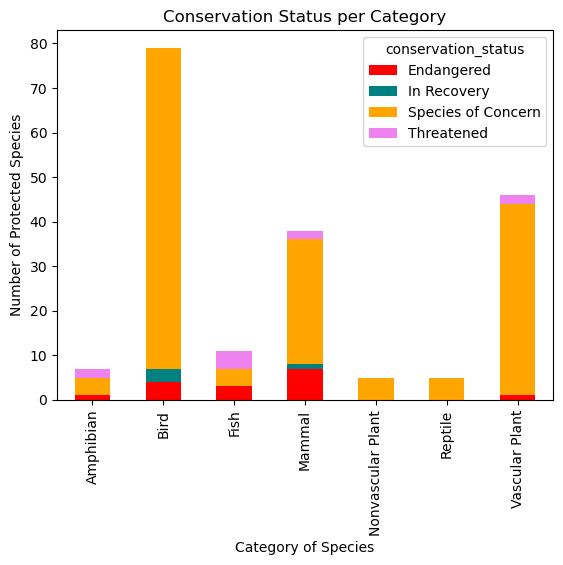

In [43]:
ax = con_cat.plot(kind='bar', stacked=True, color=['red', 'teal', 'orange', 'violet'])
ax.set_title('Conservation Status per Category')
ax.set_ylabel('Number of Protected Species')
ax.set_xlabel('Category of Species')

Text(50.72222222222221, 0.5, 'Conservation Status')

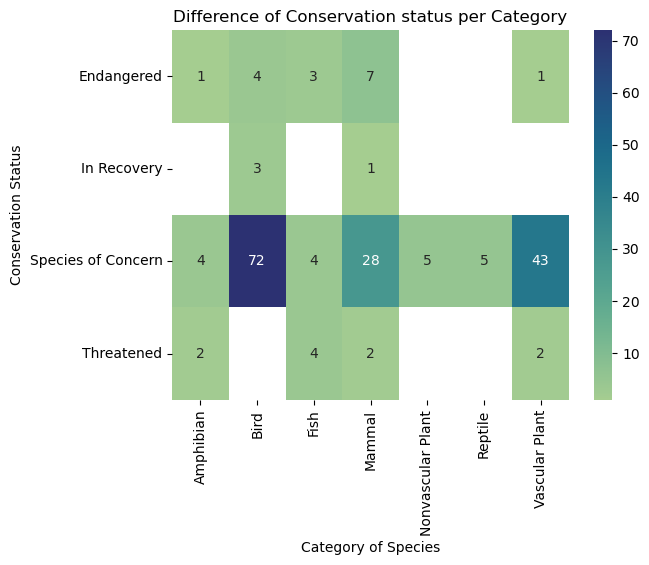

In [44]:
pivot_cat = status.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()

sns.heatmap(pivot_cat, annot=True, cmap='crest')
plt.title('Difference of Conservation status per Category')
plt.xlabel('Category of Species')
plt.ylabel('Conservation Status')

From the above chart, we can see that the Bird category has the most protected species, Nonvascular Plant and Reptile have the least. Only categories Bird and Mammal have species that are In Recovery and Mammals have the most Endangered species. 

Comparing whether a species has a conservation status (is protected) or does not (not protected), we can create a bar chart to compare this by each category of species. The percentage of species protected ranges in-between 1% and 18%. We can see that Mammals have the highest percentage of protected species whereas both the Nonvascular and Vascular Plant categories have the lowest percentage.

In [45]:
species['is_protected'] = species.conservation_status != 'nan'

protected = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected',index='category', values='scientific_name').reset_index()

protected.columns = ['category', 'not_protected', 'is_protected']
protected = protected.assign(percentage = lambda x: ((x['is_protected']/(x['is_protected']+x['not_protected']))*100).round(2))
protected

,category,not_protected,is_protected,percentage
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


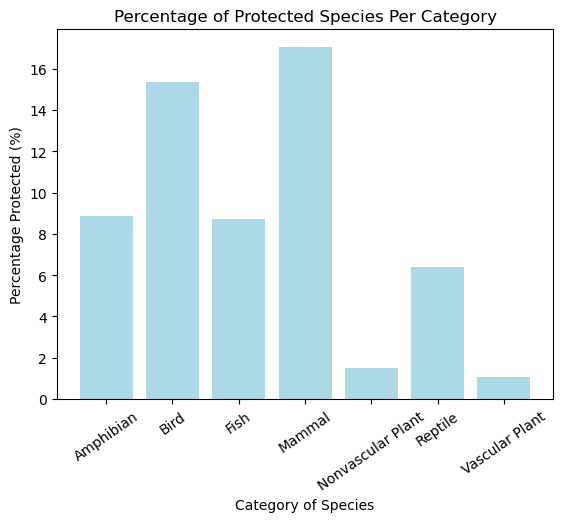

In [46]:
plt.bar(protected['category'], protected['percentage'], color='lightblue')
ax=plt.subplot()
ax.set_xticks(range(0,len(protected['category'])))
ax.set_xticklabels(protected['category'], rotation=35)
plt.title('Percentage of Protected Species Per Category')
plt.ylabel('Percentage Protected (%)')
plt.xlabel('Category of Species')
plt.show()

Total proportion of species that have a conservation status and therefore are protected is 3.23%.

In [20]:
((protected.is_protected.sum() /(protected.is_protected.sum()+ protected.not_protected.sum()))*100).round(2)

3.23

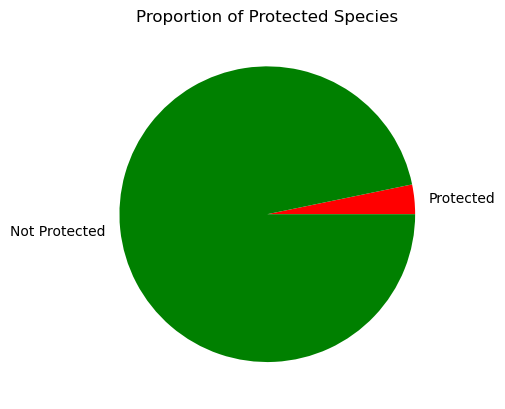

In [21]:
pie = [protected.is_protected.sum(), protected.not_protected.sum()]

plt.pie(pie, labels=['Protected', 'Not Protected'], colors=['red', 'green'])
plt.title('Proportion of Protected Species')
plt.show()

Focusing on the protected species that are Endangered, below are the common names of these 16 species.

In [22]:
temp = species[species['conservation_status'] == 'Endangered'].common_names.unique()
for t in temp:
    print(t)

Gray Wolf
Red Wolf
Gray Myotis
Indiana Bat, Indiana Or Social Myotis
Carolina Northern Flying Squirrel, Northern Flying Squirrel
Whooping Crane
Bachman's Warbler, Bachman's Wood Warbler
Red-Cockaded Woodpecker
Duskytail Darter
Smoky Madtom
Mountain Avens, Spreading Avens
June Sucker
Sierra Nevada Bighorn Sheep
Gray Wolf, Wolf
California Condor
Sierra Nevada Yellow-Legged Frog


### Observations Dataset

#### Parks

Now we can explore the observations data. We know there are four parks where observations took place, these are Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park and Yellowstone National Park. There were a total of 3,314,739 observations recorded in total. 

In [23]:
observations.park_name.unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [24]:
observations.observations.sum()

3314739

Looking further into the observations occurred, let's look at the distribution of the observations across the Parks.

Most of the observations occured in Yellowstone National Park and the least in Great Smoky Mountains National Park, as shown in the below bar chart. 

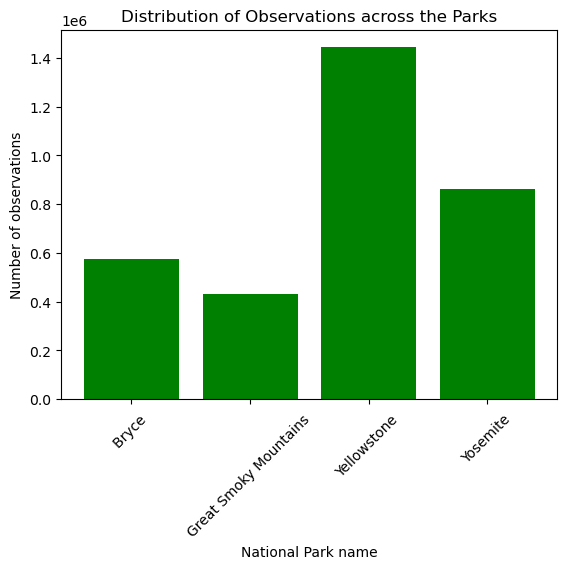

In [25]:
parks = observations
parks['park_name'] = parks['park_name'].str.replace('National Park', '')
park_data = parks.groupby('park_name').observations.sum().reset_index()
parkname = park_data.sort_values('park_name')

plt.bar(parkname['park_name'], parkname['observations'], color='green')
plt.title('Distribution of Observations across the Parks')
ax = plt.subplot()
plt.xlabel('National Park name')
plt.ylabel('Number of observations')
ax.set_xticks(range(0, len(parkname.park_name.unique())))
ax.set_xticklabels(parkname.park_name.unique(), rotation=45)
plt.show()

Each national park has the same number of unique scientific name of species recorded. As there was also 5,541 total scientific names in the dataframe, each species was recorded at every park.

In [26]:
Bryce = observations[observations['park_name'] == 'Bryce National Park']
print('Bryce NP', Bryce.scientific_name.nunique())

Yosemite = observations[observations['park_name'] == 'Yosemite National Park']
print('Yosemite NP', Yosemite.scientific_name.nunique())

GSM = observations[observations['park_name'] == 'Great Smoky Mountains National Park']
print('Great Smoky Mountains NP', GSM.scientific_name.nunique())

Yellowstone = observations[observations['park_name'] == 'Yellowstone National Park']
print('Yellowstone NP', Yellowstone.scientific_name.nunique())

print('Total unique scientific names', observations.scientific_name.nunique())

Bryce NP 0
Yosemite NP 0
Great Smoky Mountains NP 0
Yellowstone NP 0
Total unique scientific names 5541


### Merging the Dataframes

As both dataframes contain the scientific name for the species, it would imply that they can be merged. Unfortunately these dataframes cannot be merged without prior manipulation of the species dataframe as scientific name is not unique within the species dataframe, after the merge the observations will increase.

In [27]:
species[species['scientific_name'] == 'Canis lupus']

,category,scientific_name,common_names,conservation_status,is_protected
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery,True
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered,True


In [28]:
scientific = observations.merge(species)
print('Merged dataframe observations total', scientific.observations.sum())
print('Orginal dataframe observations total', observations.observations.sum())

Merged dataframe observations total 3645247
Orginal dataframe observations total 3314739


### Most and Least Observations

Reviewing the observations columns, the Corydalis aurea was observed only 9 times at Bryce National Park and the Lycopodium tristachyum was observed 321 times at the Yellowstone National Park.

In [29]:
observations[observations['observations'] <= 12].sort_values(by='observations')

,scientific_name,park_name,observations
9418,Corydalis aurea,Bryce,9
15511,Collomia tinctoria,Great Smoky Mountains,10
16054,Strix occidentalis,Great Smoky Mountains,11
18823,Rana sierrae,Great Smoky Mountains,11
20375,Sambucus mexicana,Great Smoky Mountains,12


In [30]:
observations[observations['observations'] >= 312].sort_values(by='observations', ascending=False)

,scientific_name,park_name,observations
11281,Lycopodium tristachyum,Yellowstone,321
1168,Castilleja miniata,Yellowstone,317
8749,Dracocephalum parviflorum,Yellowstone,316
20734,Cryptantha fendleri,Yellowstone,316
7112,Bidens tripartita,Yellowstone,314
1742,Schoenoplectus tabernaemontani,Yellowstone,312
3891,Polemonium reptans,Yellowstone,312


Let's now look at total observations of a species regardless of where the observations was made. The species, Grus americana had the least total observations of 131 and Streptopelia decaocto has the most total observations of 1,785.

In [31]:
observe = observations[['scientific_name', 'observations']].groupby('scientific_name').sum().reset_index()

In [32]:
observe[observe['observations'] <= 140].sort_values(by='observations')

,scientific_name,observations
2323,Grus americana,131
805,Canis rufus,137


In [33]:
observe[observe['observations'] >= 1750].sort_values(by='observations', ascending=False)

,scientific_name,observations
4993,Streptopelia decaocto,1785
2452,Holcus lanatus,1780


We can use the species dataframe to find out that both the most and least observed species are from the Bird category.

In [34]:
print('The most observed species belong to the {} category'.format(species[species['scientific_name'] == 'Grus americana'].category.unique()))
print('The least observed species belong to the {} category'.format(species[species['scientific_name'] == 'Streptopelia decaocto'].category.unique()))

The most observed species belong to the ['Bird'] category
The least observed species belong to the ['Bird'] category


With our dataset focusing on the scientific name, we can use the species dataframe to add the category type. Since the category of a scientific name does not change for different rows of the same name, we can merge the dataframes by the scientific name, adding the category of the species to the observations.

In [35]:
cat = species[['scientific_name', 'category']].sort_values(by='scientific_name')
cat = cat.drop_duplicates(subset=['scientific_name', 'category'])
cat.head()

,scientific_name,category
4061,Abies bifolia,Vascular Plant
5443,Abies concolor,Vascular Plant
1928,Abies fraseri,Vascular Plant
2908,Abietinella abietina,Nonvascular Plant
3736,Abronia ammophila,Vascular Plant


In [36]:
observe_cat = observe.merge(cat, on='scientific_name').reset_index()

categories = observe_cat[['category', 'observations']].groupby('category').sum().reset_index()
categories

,category,observations
0,Amphibian,43971
1,Bird,292833
2,Fish,70818
3,Mammal,116696
4,Nonvascular Plant,190653
5,Reptile,44678
6,Vascular Plant,2555090


Now we have the total number of observations per category of species, we can create a bar chart to visualise this. We can see that there were a lot more observations of Vascular Plant than any other category. 

To see the difference between the other categories easier, let's remove the Vascular Plant row. We can now see that the category Bird has the next most observations, Reptile and Amphibian have the least observations.

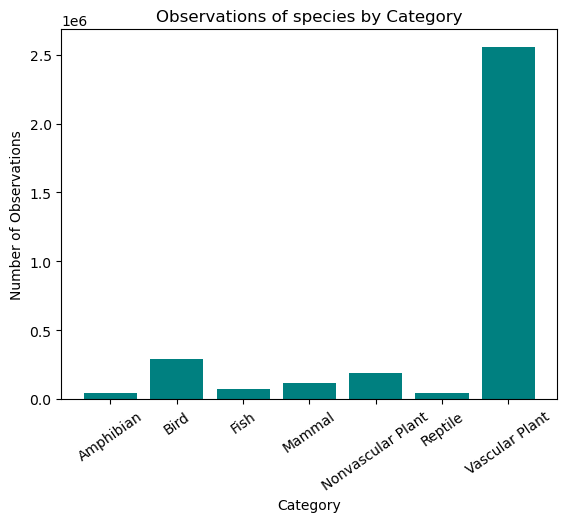

In [37]:
plt.bar(categories.category, categories.observations, color='teal')
plt.title('Observations of species by Category')
plt.xlabel('Category')
plt.ylabel('Number of Observations')
ax = plt.subplot()
ax.set_xticks(range(0, len(categories.category)))
ax.set_xticklabels(categories.category, rotation=35)
plt.show()

In [38]:
categories_drop = categories.drop(index=6)
categories_drop

,category,observations
0,Amphibian,43971
1,Bird,292833
2,Fish,70818
3,Mammal,116696
4,Nonvascular Plant,190653
5,Reptile,44678


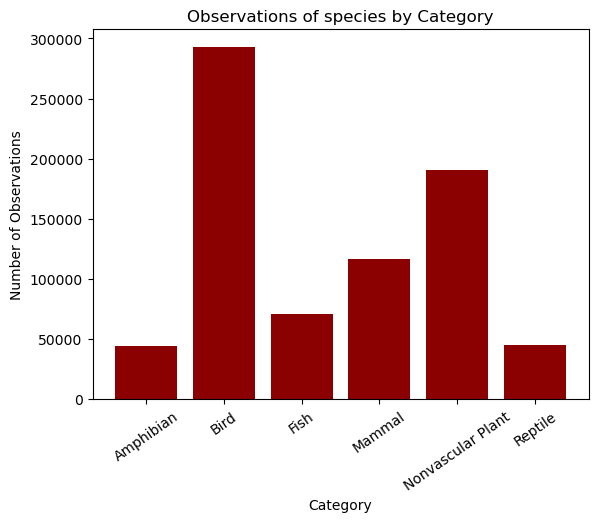

In [39]:
plt.bar(categories_drop.category, categories_drop.observations, color='darkred')
plt.title('Observations of species by Category')
plt.xlabel('Category')
plt.ylabel('Number of Observations')
ax = plt.subplot()
ax.set_xticks(range(0, len(categories_drop.category)))
ax.set_xticklabels(categories_drop.category, rotation=35)
plt.show()

Let's now re-create this merge but taking into account the park names. We can then create a chart to show the observations were taken for each category in every park. 

For every park, there were mostly Vascular Plants and Amphibians were least observed.

In [40]:
observe = observations[['scientific_name', 'park_name', 'observations']].groupby(['scientific_name', 'park_name']).sum().reset_index()
cat = species[['scientific_name', 'category']].sort_values(by='scientific_name')
cat = cat.drop_duplicates(subset=['scientific_name', 'category'])
observe_cat = observe.merge(cat, on='scientific_name').reset_index()
categories = observe_cat[['category','park_name', 'observations']].groupby(['park_name', 'category']).sum().reset_index()
park_cat = categories.groupby(['park_name', 'category'])['observations'].sum().unstack()
park_cat

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce,7380,51647,12423,20550,32992,7950,443083
Great Smoky Mountains,5707,37728,9206,15012,24857,5691,333619
Yellowstone,19440,127251,30574,50795,83021,19554,1112927
Yosemite,11444,76207,18615,30339,49783,11483,665461


Text(0.5, 0, 'Park Name')

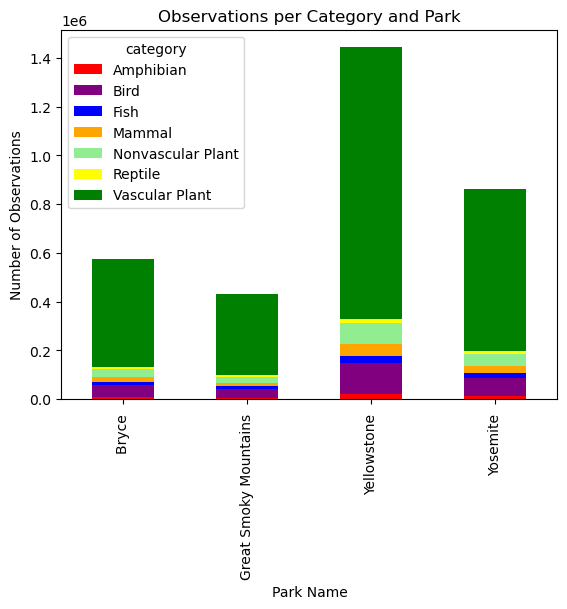

In [41]:
ax = park_cat.plot(kind='bar', stacked=True, color=['red', 'purple', 'blue', 'orange', 'lightgreen', 'yellow', 'green'])
ax.set_title('Observations per Category and Park')
ax.set_ylabel('Number of Observations')
ax.set_xlabel('Park Name')

### Conclusion

We have investigated the dataframes given, reviewing the original questions that we posed;
* *Out of the all the species, what proportion of total number of species are protected?*
    - We have seen that there is only 3.23% of species are protected but this varies between 1.08% and 17.05% across the different categories of species. Mammals and Birds have the highest proportion of protected species.
* *Is there a particular park where more observations were made?*
    - Most observations were made in Yellowstone National Park but every scientific name mentioned in the dataframes have been observed in each of the parks. We also investigated the number of observations for each category in each park where Vascular Plant were most observed and Amphibians were least observed.
* *What species are endangered, what are their common names?*
    - We found the species names that were endangered. There are 16 of these, of which the common names have been listed.
* *Across all the parks, what species is the most/ least common?*
    - We found which species were most and least common across the parks as well as what category of species were most and least common across the parks.
* * Across all the parks, what category of species is most/ least common?
    - There were mostly species from the Vascular Plant category observed and least of the Reptile category.

### Evaluation

Despite that the data is not real data, only inspired. There are some aspects that may have effected the data. It would be helpful to know what the timeframe that the data was collected under; for example across only one day or across a month. Also, whether it was taken at the same time by different people or did one person/ team complete the data for example not all taken in the exact week as the other parks. If it was multiple people, how do we know that the same Vasular Plant was not counted 50 times where a Replite was counted once. These are considerations when analysing the data.

If it were to be taken again, the location where the species was observed could be recorded to understand if there is more densely populated areas of the parks.

#### Data Source:

Both data sets provided by Codecademy but only inspired by real data